# An exploratory analysis into the National Basketball Association (1980-2017) 

******************************
## Project Outline
"**<i>Analytics are part and parcel of virtually everything we do now</i>**" (National Basketball Association (NBA) commissioner Adam Silver at an analytics conference held by Wharton School of Business in 2017) [[1]](http://knowledge.wharton.upenn.edu/article/nbas-adam-silver-analytics-transforming-basketball/)

In recent times, data and analytics have played an important role in shaping the NBA. Nearly every team employs data analysts to work with coaches and players to maximise team and player efficiency. As a result, the NBA collects a wide array of data from personal player attributes to in game statistics to player tracking via wearables. 

This project aims to use some of this data to conduct an exploratory analysis into the NBA since the 1980s. To showcase a range of visualisations, player positions, shot types and player background will be explored. To obtain further insights into the data, data modelling is also used. The main goals of this project are to:

•	Understand some of the basic statistics and how they interact with other variables.

•	Gain a better understanding of the types of players the NBA attracts.

•	Identify how the NBA has evolved over time. 

*********************************

## Data
This project uses two CSV file datasets from Kaggle [[2]](https://www.kaggle.com/drgilermo/nba-players-stats#Seasons_Stats.csv). Kaggle’s API is used to access both datasets and the Python library Pandas is used to read the file into this Jupyter Notebook. 


The first dataset is called Season_Stats.csv and contains information on each NBA player’s season statistics (e.g. points, age, games played etc) since the 1950s. It has 24,691 rows and 53 columns.The second dataset is called Players.csv and contains information on the personal attributes of each NBA player since the 1950s (e.g. height, weight, college, birth state etc). It has 3923 rows and 8 columns. For an explanation of each variable please see the README file in my project repository (note I have only described in detail variables which are used throughout this project).  

To create the main dataset a number of data cleaning and feature engineering techniques are conducted (more details in section 2 on data cleaning and feature engineering). Furthermore, a few sub-datasets were created which are used for specific visualisations throughout the project. 

*********************************


## Executive Summary

This project explores many avenues of the NBA, some of the key findings can be found below:

* The NBA attracts players with different physical attributes, despite the consensus that it only attracts tall athletic players. 
* The 3-point shot now plays a more prevalent role in the game. 
* The NBA recruits players from all around the globe, however the majority of players still come from the United States (US). 
* Low win teams tend to trade their players more. 

*********************************




## Contents


I. Importing Libraries & Data
<br>
II. Data Cleaning and Feature Engineering 
<br>
III. Data Visualisation
<br>
IV. Data Modelling
<br>
V. Conclusion
<br>
VI. References

## I. Importing Libraries & Data

In [1]:
# Libraries

import pandas as pd
import numpy as np
import joypy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
from ipywidgets import interact
import ipywidgets as widgets
import missingno as msno
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
import folium
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='USERNAME', api_key='API KEY')

import networkx as nx
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either PyGraphviz or pydot")

In [2]:
# Data acquisition
# Kaggle API downloads files to cwd

!kaggle datasets download drgilermo/nba-players-stats -w --unzip 


  0%|          | 0.00/2.13M [00:00<?, ?B/s]
 47%|####6     | 1.00M/2.13M [00:03<00:04, 294kB/s]
 94%|#########3| 2.00M/2.13M [00:03<00:00, 411kB/s]
100%|##########| 2.13M/2.13M [00:03<00:00, 592kB/s]


In [2]:
# import data
player_info = pd.read_csv('Players.csv')
print("player_info shape:", player_info.shape)

player_info.head(4)

player_info shape: (3922, 8)


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN


In [3]:
season_stats = pd.read_csv('Seasons_Stats.csv')
print("season_stats shape:", season_stats.shape)

season_stats.head(4)

season_stats shape: (24691, 53)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0


The data includes many missing observations (e.g. NaN) and irrelevant columns (e.g. FT%) thus requuiring cleaning the data before further analysis can be conducted. 

## II. Data Cleaning and Feature Engineering 

This will involve the following:

1. Renaming the column "Unnamed: 0" in season_stats to "ID"
2. Removing the column "Unnamed: 0" in player_info, reindexing player_info on "Player" and renaming columns
3. Join player_info to season_stats on "Player"
4. Slice dataset to only include data from the 1980s onwards
5. Remove unwanted features
6. Remove inactive players
7. Replace missing values and drop null observations 
8. Rename main dataframe to player_stats, index on ID and convert 'Year' to int type

#### 1. Rename the column "Unnamed: 0" in season_stats to "ID"

This is so ID can act as a unique identifier for each row (note this is not necessary for player_info as the player's names act as unique identifiers). 

In [4]:
season_stats = season_stats.rename(index=str, columns={"Unnamed: 0": "ID"})

##### 2. Removing the column "Unnamed: 0" in player_info, reindexing player_info on "Player" and renaming columns

In [5]:
player_info.drop('Unnamed: 0', axis=1, inplace=True) 
player_info.set_index('Player', inplace=True) 
player_info.columns = ['Height', 'Weight', 'College', 'Born', 'Birth_City', 'Birth_State']

#### 3. Join player_info to season_stats on "Player"

This adds 6 columns to our dataframe taking the total from 53 to 59 columns. 

In [6]:
joined_stats = season_stats.join(player_info, on="Player")
print(joined_stats.shape)

(24691, 59)


##### 4. Slice dataset to only include data from the 1980s onwards

As with many professional sports leagues, the NBA's rules and practices have changed over time. This was done to accommodate the way the game was played and restrict certain players/teams from dominating or exploiting previous rules/practices. A classic example of a practice change, as a result of a player, is when the NBA redesigned the basketball hoop and backboard after Shaquille O'Neal brought it down with [this commanding dunk.](https://youtu.be/HK1Ltjl_7xk?t=18)[[3]](https://youtu.be/HK1Ltjl_7xk?t=18). However, for this project I will only look at major changes. 

For the most part, the major rules and practices have remained consistent since the 1980s. For example, an important feature -- the 3-point shot, emerged in the 1980s when the NBA implemented the 3-point line. Resultantly, the NBA have since collected an array of 3-point statistics e.g. 3-pointers made/attempted/percentage. Therefore, this project will only use data between 1980-2017. Consquently, this reduces the number of rows in the dataframe from 24,691 to 18,927. 


In [7]:
sliced_stats = joined_stats[joined_stats.Year >= 1980]
#print(sliced_stats.shape)

#### 5. Remove unwanted features

There are a number of features which are not of interest to this project, thus they will be removed. The variables kept are the ones which address the main aims of this project (see project outline). This reduces the number of columns in our dataframe from 59 to 30. 

In [8]:
useful_cols = ['ID', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER','3PAr', 'FTr', 'WS', '3P', 
               '3PA', '2P', '2PA','FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK','TOV', 'PF', 'PTS', 'Height',
               'Weight', 'College', 'Birth_City','Birth_State']
sliced_stats = sliced_stats[useful_cols]
#print(sliced_stats.shape)

#### 6. Remove inactive players
The mode of the number of games played is 82 and the range is 0 to 85. To prevent players who have low playing time on influencing the study, I decided to remove anyone who played less than 20 games. This removes 3,678 observations leaving us with 15,249 observations.

In [9]:
sliced_stats = sliced_stats[sliced_stats.G >= 20]
#print(sliced_stats.shape)

#### 7. Replace missing values and drop null observations

The visualisation below allows one to get a visual representation of the completeness of their dataset (i.e. to see how many missing values they have). Each column the sliced_stats dataframe is split by a vertical white line. The black areas in each row represent data and the white horizontal lines represent missing data. 

From observing the visualisation, the columns 'College', 'Birth_City' and 'Birth_State' appear to contain missing values. 'College' appears to contain most null observations of the three. This can be explained by a number of reasons which were discovered throughout different stages in the project: 
* the player may not have attended college (many great NBA players chose to skip college and enter the pros immediately after high school e.g. Lebron James, Kobe Bryant)
* cells are empty for non-American-college players
* they are in fact missing observations

As it is hard to distinguish between the three explanations, missing observations in 'College' were not dropped as they potentially capture information about some of the NBA's best domestic and international players. Furthermore, if you look closely at the graph many of the observations that are missing from 'Birth_City' and 'Birth_State' are also missing from 'College'. Thus, this project assumes that they are the actual missing values for 'College'. Subsqeuently, these observations were removed when the rows for missing observations for 'Birth_City' and 'Birth_State' were removed. This cut 530 observations from our dataset leaving us with 14,719 observations. 

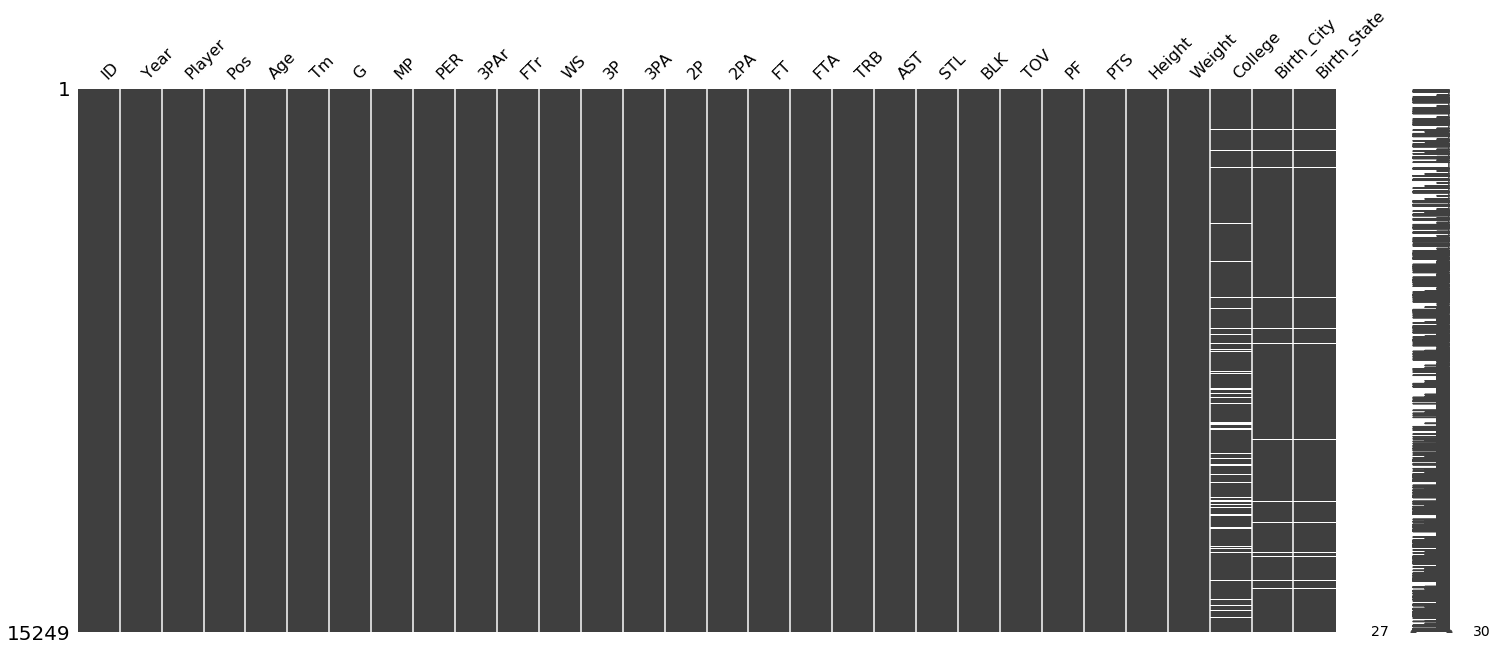

In [10]:
sliced_stats.fillna(method='ffill')
#sliced_stats.isnull().sum() 

msno.matrix(sliced_stats);

In [11]:
sliced_stats = sliced_stats.dropna(subset=['PER', '3PAr', 'FTr', 'Birth_City', 'Birth_State'], how='any')
#print(sliced_stats.shape)
#sliced_stats.isnull().sum()

#### 8. Rename main dataframe to player_stats, index on ID and convert 'Year' to int type

The main dataframe used for analysis will be player_stats. The dataframe contains 14,719 observations and 29 features. 'Year' is converted to int type as it aids with analysis later. 

In [12]:
sliced_stats['Year'] = sliced_stats.Year.astype(int)
player_stats = sliced_stats
player_stats.set_index("ID",drop=True,inplace=True)
print(player_stats.shape)
player_stats.head(3)

(14719, 29)


,Year,Player,Pos,Age,Tm,G,MP,PER,3PAr,FTr,...,STL,BLK,TOV,PF,PTS,Height,Weight,College,Birth_City,Birth_State
ID,,,,,,,,,,,,,,,,,,,,,
5727,1980,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,3143.0,25.3,0.001,0.344,...,81.0,280.0,297.0,216.0,2034.0,218.0,102.0,"University of California, Los Angeles",New York,New York
5728,1980,Tom Abernethy,PF,25.0,GSW,67.0,1222.0,11.0,0.003,0.258,...,35.0,12.0,39.0,118.0,362.0,201.0,99.0,Indiana University,South Bend,Indiana
5729,1980,Alvan Adams,C,25.0,PHO,75.0,2168.0,19.2,0.002,0.270,...,108.0,55.0,218.0,237.0,1118.0,206.0,95.0,University of Oklahoma,Lawrence,Kansas


Although this is the main dataframe used throughout this project, other dataframes are occassionally used later in the project which are either derived from this dataframe or derived from this dataframe and combined with further data. 

## III. Data visualisation

This section starts by offering some summary statistics and visualisations into the main dataset: player_stats. This is followed by visual analysis into three different areas, outlined below:

1. Summary statistics
2. Position analysis
3. Shot analysis
4. Player background analysis

### 1. Summary statistics 

Summary statistics are a great way to provide an overview of the data and ensure it is providing results in line with expectations. Additionally, these statistics help one to familiarise themselves with the data before exploratory analysis. 

Initially, the mean, minimum and maximum values are presented for each variable (note for categoric variables the output below presents NaN for the mean and the alphabetically highest name for the min and vice versa for the max). A few examples of interesting findings from the output include the mean age is around 27 (this ranges from 18-43 years old), the most points in a season by a player is 3041 points and the lightest player to play in the NBA is 60kg. 

In [36]:
pd.set_option('display.max_columns', 30) # shows all columns of dataframe
player_stats.agg(['min','max','mean']).round(2)

,Year,Player,Pos,Age,Tm,G,MP,PER,3PAr,FTr,WS,3P,3PA,2P,2PA,FT,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,Height,Weight,Birth_City,Birth_State
min,1980.00,Aaron Brooks,C,18.00,ATL,20.00,59.00,-3.80,0.00,0.00,-2.10,0.00,0.00,0.00,2.00,0.0,0.00,2.00,0.00,0.00,0.00,1.00,2.00,6.00,160.0,60.00,Abbeville,Alabama
max,2017.00,Zydrunas Ilgauskas,SG-SF,43.00,WSB,85.00,3533.00,31.70,0.94,1.58,21.20,402.00,886.00,1086.00,2213.00,833.0,972.00,1530.00,1164.00,301.00,456.00,464.00,386.00,3041.00,231.0,149.00,Zurich,Wyoming
mean,2000.02,NaN,NaN,26.94,NaN,59.45,1417.92,13.45,0.16,0.31,2.98,26.75,76.46,200.37,414.04,115.0,152.54,250.02,135.51,47.28,29.81,88.81,131.88,595.98,200.3,96.83,NaN,NaN


We can also observe the tallest and shortest players in the NBA. The image below shows an iconic photo of tallest player, Manute Bol (7ft 7inches) next to the shortest player, Mugsy Bogues (5ft 3 inches). [[4]](https://www.reddit.com/r/sports/comments/25h2q9/manute_bol_and_muggsy_bogues_of_the_87_washington/)

The top 3 tallest NBA players (cm)
Player
Gheorghe Muresan    231.0
Manute Bol          231.0
Shawn Bradley       229.0
Name: Height, dtype: float64

The top 3 shortest NBA players (cm)
Player
Muggsy Bogues    160.0
Earl Boykins     165.0
Spud Webb        168.0
Name: Height, dtype: float64


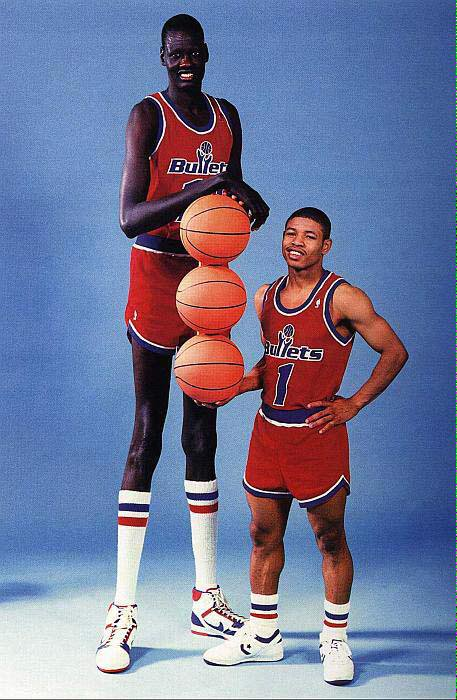

In [59]:
print('The top 3 tallest NBA players (cm)')
print(player_stats.groupby('Player').Height.mean().nlargest(3))
print('\nThe top 3 shortest NBA players (cm)')
print(player_stats.groupby('Player').Height.mean().nsmallest(3))
Image("Manute Bol and Muggsy Bogues.jpg", width=250, height=250)

Moreover, to see a visual representation of the yearly distribution of each numeric feature in the dataframe please see the graph below (note it is interactive -- so feel free to change the variable). One interesting example is personal fouls (PF). We can see the range of PF's has decreased over time, implying that not many NBA players recieve a high number of fouls in todays game. Many ex-NBA players argue the NBA has become soft which this may support, however a counter argument could be made that the referees are more reluctant to hand out fouls as it slows down the pace of the games and could potentially lead to a player not playing a game which could reduce ratings and views by fans, thus reducing the NBA's revenue. 

In [17]:
def dist(feature):
    '''Creates distribution graph for a given feature of every players statistics every year since the 1980s.'''
    
    fig, ax = joypy.joyplot(player_stats, by="Year", column=feature, range_style='own', 
                          grid="y", linewidth=0.7, legend=False, figsize=(8,8),
                          title= str(feature) + " distribution since 1980", 
                        colormap=cm.autumn_r, xlabels = True, tails = 0)
    
    ax[-1].set_xlabel(feature, fontsize = 14)
    ax[20].set_ylabel('Year', fontsize = 14)
    
    plt.show()
    
# interactive plot to change main feature of the plot
numeric_var = ['Age','G', 'MP', 'PER','3PAr','FTr','WS','3P', '3PA', '2P', '2PA', 'FT', 'FTA',
                     'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Height', 'Weight']
features = numeric_var
interact(dist, feature = features)

interactive(children=(Dropdown(description='feature', options=('Age', 'G', 'MP', 'PER', '3PAr', 'FTr', 'WS', '…

<function __main__.dist(feature)>

Finally, we observe the top 10 players with the most cumulative statistics, in each major in game statistic, since the 1980s (note this plot is interative -- so feel free to change the variable). 

In [18]:
# set plot style
#print(plt.style.available)
plt.style.use('ggplot')

def bar_chart(feature):
    '''Creates barchart to compare the top 10 players for a given feature.
    Takes the feature (column name) of the dataframe as the argument.'''
    
    # set plot
    TopPlayers = player_stats[['Player',feature]].groupby('Player').sum().sort_values(feature, ascending = False).head(10)
    fig, ax = plt.subplots(figsize=(10,6))
    
    # set labels
    plt.title('Top 10 players for each major in game statistic since the 1980s', pad = 20)
    plt.ylabel(feature)
    plt.xlabel('Player')
    TopPlayers.plot(kind='bar', color='orange', alpha = 0.8, ax=ax, fontsize = 10)
    ax.tick_params(axis='x', rotation=45)
    
    #show plot
    plt.show()

# interactive plot to change main feature of the plot
features = ['PTS','TRB', 'AST', 'STL','BLK', 'TOV', 'PF']
interact(bar_chart, feature = features)

interactive(children=(Dropdown(description='feature', options=('PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF')…

<function __main__.bar_chart(feature)>

### 2. Position analysis 

This section will look at whether player's physical attributes and in game statistics can be used to identify the position they play.

There are 5 main positions in the NBA -- the Point Guard (PG), Shooting Guard (SG), Small Forward (SF), Power Foward (PF) and Center (C). A brief summary of these 5 positions can be found below. 

**PG** - often the shortest player on the team and best dribbler, they are responsible for advancing the basketball up the court and initiating the team's offense. 
<br>
**SG** - often the second shortest on the team, the best shooter and plays on the wing.
<br>
**SF** - often the third tallest, most versatile on the defensive and offensive ends, long and athletic and generally the second or third best shooter.
<br>
**PF** - often the second tallest on the team, responsible for playing close to the basketball hoop by scoring, blocking opponent's shots and getting rebounds from misses. They sometimes have a mid-range jump too (i.e. in between the basketball and the 3-point line). 
<br>
**C** - often the tallest and strongest player, mostly play close to the basket by scoring, blocking shots and getting rebounds from misses. 

For more information please watch this [video](https://www.youtube.com/watch?v=4_4CymXARWQ) or read this [link.](https://www.basketballforcoaches.com/basketball-positions/) [[5]]((https://www.youtube.com/watch?v=4_4CymXARWQ) [[6]](https://www.basketballforcoaches.com/basketball-positions/)

In our dataset players are classed as not only 1 of the 5 main positions, but also if they fall into 2 or 3 categories. To avoid confusion, in this section, this project will only look at players falling into 1 of the 5 main categories. 

Firstly, we look at a boxplot to see whether there is a difference in height, weight and age for each position.

The results for height and weight are in line with the theory -- the smallest/lightest players are the PGs and the tallest/heaviest players are the Cs. Note, that the range in height for each position barely differs, however there is a slight difference in the range of weight between the lightest and heaviest players. Also, there are more outliers for height in each category than for weight (probably because extreme weights are unhealthy and not tolerated). 

Interestingly for age all of the positions are nearly identical other than SFs upper range and PGs lower range. The SFs position requires the most athletism of any position, as athletism declines with age this makes sense. The range for PGs is probably not as low as it is the position which requires the most basketball IQ as it requires one to orchestrate the offense. Younger players are more likely to be immature and not as capable of this task so this also makes sense.  

In [19]:
# sorts df by position
positions = player_stats[(player_stats['Pos']== 'C') | (player_stats['Pos']== 'PF') | (player_stats['Pos']== 'SF') |
                         (player_stats['Pos']== 'SG') | (player_stats['Pos']== 'PG')]

positions = positions.sort_values('Weight') # sorts dataframe by weight to order x values from PG,SG,SF,PF,C


def boxplot(feature):
    '''Creates boxplot for feature in a dataframe.'''
    fig, ax =plt.subplots(figsize = (12,9))
    sns.boxplot(data=positions, x='Pos', y=feature, ax = ax)
    ax.set_xlabel('Position')
    ax.set_title("Boxplot of NBA Player's " + str(feature), pad = 20)
  

features = ['Height','Weight', 'Age']
interact(boxplot, feature = features)

interactive(children=(Dropdown(description='feature', options=('Height', 'Weight', 'Age'), value='Height'), Ou…

<function __main__.boxplot(feature)>

The next graph is a stacked bar plot and will look at the difference for in game statistics for rebounds (TRB), assists (AST), steals (STL), blocks (BLK), turnovers (TOV), personal fouls (PF) and points (PTS) for each position. 

To put the graph into perspective the average number of total in game statistics accumulated throughout a season for the average NBA player is computed below. 

In [60]:
in_game_stats = player_stats[['TRB', 'AST', 'STL','BLK','TOV','PF','PTS']]
in_game_stats_mean = in_game_stats.mean().round(2).astype('int')

round(in_game_stats_mean,0)

TRB    250
AST    135
STL     47
BLK     29
TOV     88
PF     131
PTS    595
dtype: int32

From the stacked bar plot we can see that SGs and SFs score the most points (PTS) which makes sense given that SG and SF tend to be the best two shooters on the team. Taller players tend to acquire more blocks, rebounds and fouls - this may be because they have more of a defensive role and play closer to the basket which is where most of the contact and fouls are made. Turnovers and assists are highest with PGs. This makes sense as they are the floor generals which distribute the ball; they tend to have the ball in their possession for the longest period of time giving them more time to turn it over or to make a play. Steals tend to be higher for smaller players as they are most swift and nibble.    

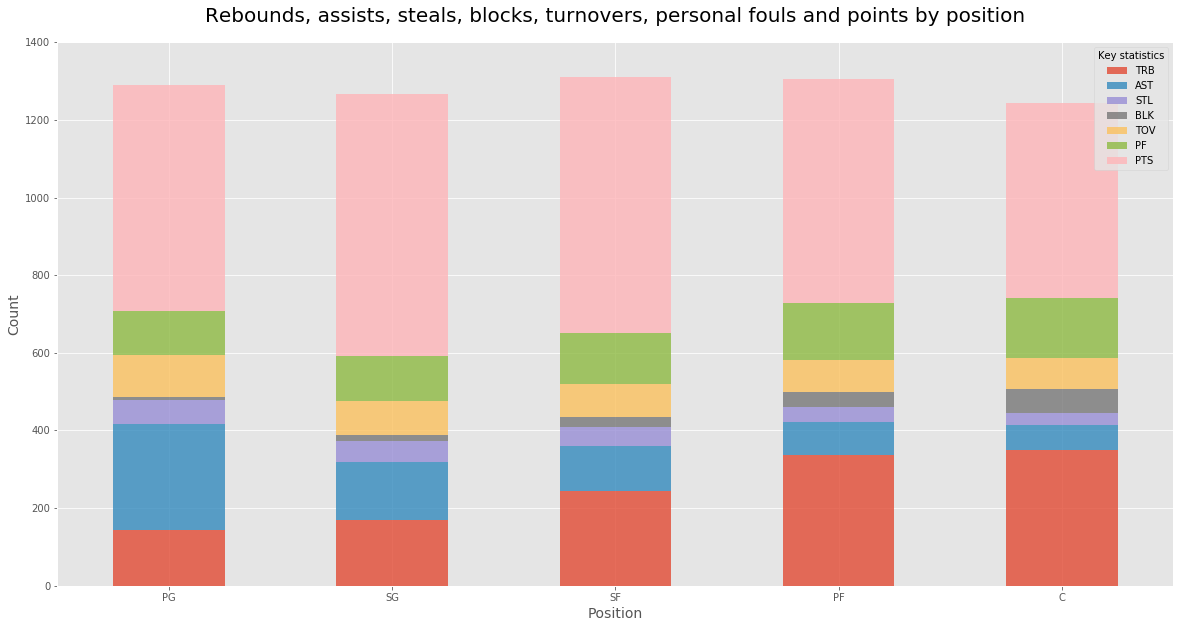

In [61]:
# creates df for the average key in game statistics
positions_avg = positions.groupby('Pos').mean().round(2)
positions_key = positions_avg.iloc[:,14:21]
positions_key = positions_key.sort_values('TRB') # sorts dataframe by rebounds to sort x values from PG,SG,SF,PF,C

# set figure 
fig, ax = plt.subplots(figsize=(20,10))
positions_key.plot(kind='bar', stacked=True, alpha=0.8, ax=ax)

#set labels
ax.set_ylabel('Count', fontsize = 14)
ax.set_xlabel('Position', fontsize = 14)
ax.set_title('Rebounds, assists, steals, blocks, turnovers, personal fouls and points by position', fontsize=20, pad = 20)
ax.set_ylim([0,1400])
ax.legend(title = 'Key statistics', fontsize = 10)
ax.tick_params(axis='x', rotation=0);

### 3. Shot analysis

Now that we have become acquainted with some of the basic statistics in basketball it is time to delve into a hot area in the basketball world right now -- the 3-point shot vs the 2-point shot. 

NBA executives like ex-computer scientist Daryl Morey have shown with analytics that the best 'buck for bang' shots to take are the [dunk and 3-pointer.](https://www.youtube.com/watch?v=oUvvfHkXyOA) [[7]](https://www.youtube.com/watch?v=oUvvfHkXyOA) If you do the maths, per 100 possessions you only need to make 1/3 of your 3-point shots to get the same number of points as if you make 1/2 of your 2-point shots (33% x 3 x 100 ≈ 100 vs 50% x 2 x 100 = 100). As a result, all competitive teams now have multiple 3-point shooters on the team.  

This section starts by providing descriptive statistics for these two types of shot. This will be followed up to investigate which other variables are correlated with these shots. Finally, this study will look at how these shots have changed over time and whether they are worth taking. 

Firstly, we look at 3-point attempts (3PA) vs the 2-point attempts (2PA) in a season. From the graph below clearly more 2s are taken than 3s. Most players take around 100 3-pointers and around 400 2-points in a season. Very few players take more than 500 3-pointers or 1500 2-pointers. Clearly, the 2-point shot is still more popular as it is easy to make (as it is closer to the basket). 

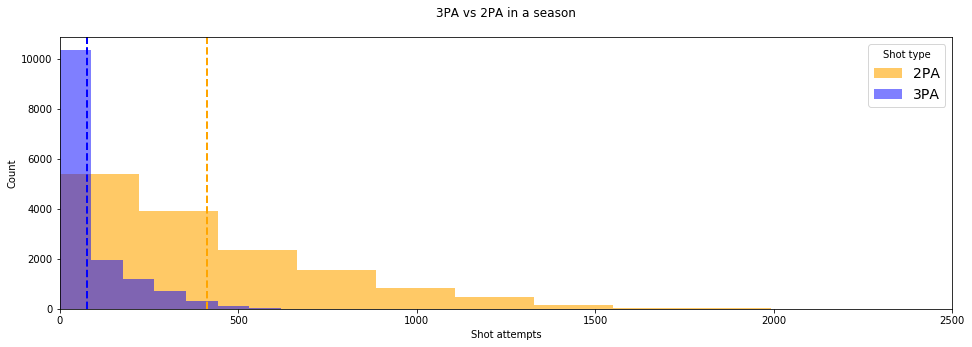

In [20]:
#set figure
fig, ax = plt.subplots(figsize=(16, 5))

# set plot 
ax.hist(player_stats["2PA"], color = 'orange', alpha = 0.6)
ax.hist(player_stats["3PA"], color="blue", alpha = 0.5)
ax.set_title('3PA vs 2PA in a season', pad = 20)

#set labels
ax.set_xlim([0,2500])
ax.legend(title = 'Shot type', fontsize = 14)
ax.set_xlabel('Shot attempts')
ax.set_ylabel('Count')
ax.axvline(player_stats['3PA'].mean(), color='blue', linestyle='dashed', linewidth = 2)
ax.axvline(player_stats['2PA'].mean(), color='orange', linestyle='dashed', linewidth = 2);

Do 3PA and 2PA vary by attribute (height, weight, age)? 

From the interactive graph below we can see that players between 185-215cm and 190-205cm generally shoot the most 2-pointer and 3-pointers respectively. From the boxplot in the last section we can see that players in these height ranges are the PGs, SGs, SFs and the SGs, SFs respectively. Thus, players who are supposed to be the better shooters on the team tend to take the most shots. The weight of players tells a similar story, this is unsurprising as height and weight are likely highly correlated. 

As for age, a high number of both shots are taken between 25-30 years old. Most NBA players hit their physical prime between these ages, so will tend to have the most playing time and shot attempts for a season during these years.  

In [13]:
def scatter_plot(feature):
    '''Create scatter plot of a feature vs 2PA and 3PA.'''
    
    # set figure
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # set plot
    ax.scatter(player_stats[feature], player_stats["2PA"], color = 'orange', alpha = 0.3, linewidth = 3)
    ax.scatter(player_stats[feature], player_stats["3PA"], color = 'blue', alpha = 0.3, linewidth = 3)
    
    # set labels
    ax.set_ylim([0,2500])
    ax.legend(title = 'Shot type', fontsize = 14)
    ax.set_title(str(feature) + ' vs shots attempted by type of shot (2P and 3P)', pad = 20, fontsize = 16)
    ax.set_ylabel('Shots attempted', fontsize = 14)
    ax.set_xlabel(feature, fontsize = 14)

    #show plot
    plt.show()

# interactive colour change of the plot
features = ['Height', 'Weight', 'Age']
interact(scatter_plot, feature = features)

interactive(children=(Dropdown(description='feature', options=('Height', 'Weight', 'Age'), value='Height'), Ou…

<function __main__.scatter_plot(feature)>

The 3-point was introduced to the NBA in 1980, how did this effect the 2-point shot?

Below we can see the timeline of 2PA and 3PA since 1980. Clearly there has been a general decrease in 2PA and an increase in 3PA over time. 

Some of the interesting features of the graph are annotated. In 1998-99 and 2011-12 the NBA experienced lockout seasons where players and team owners could not come to an agreement on payment conditions. This resulted in players striking and a shortened season for both years. Consequently, as the number of games decreased we can see a fall in the number of shots taken during those seasons. Additionally, in 1994-97 the NBA decreased the distance of the 3-point line (as many games in the previous few seasons had been low scoring) which resulted in an uptick in 3 point shots. However, it dipped after 1997 when the original line was re-established and only recovered to the previous attempts in 2007. 

The most important aspect of the graph may be the recent uptick in 3PAs. Since 2015 the Golden State Warriors (GSW) and their star player Stephen Curry have dominated the league winning 3 of the last 4 championships. This team has built a dynasty on their 3-point shooting and Stephen Curry is known to many as the best shooter of all time, frequently taking shots much [further away than the 3-point line.](https://www.youtube.com/watch?v=5_Of0iDAE3g) [[8]](https://www.youtube.com/watch?v=5_Of0iDAE3g) Their style of play has revolutionised the way players, coaches, teams and management view the game. It will be interesting to see if this trend in 3-pointers continues in the future. 

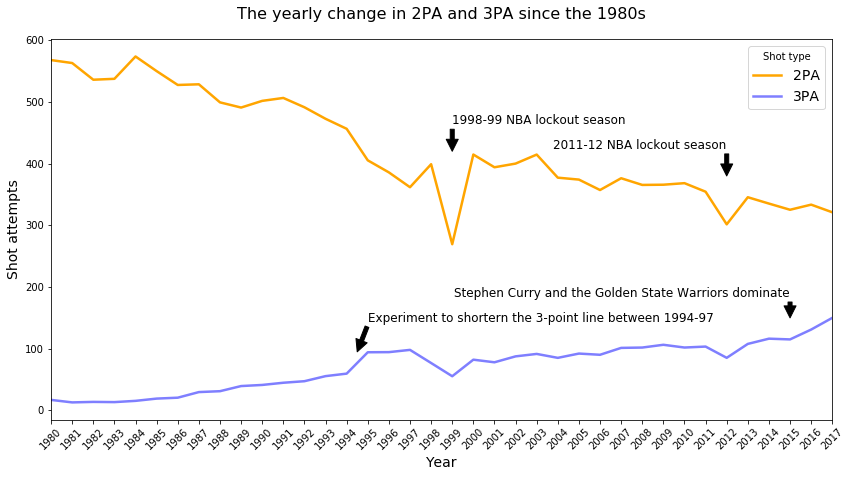

In [16]:
# create df looking at yearly average of each variable
yearly_stats = player_stats.groupby("Year").mean().reset_index()

# set figure
fig, ax = plt.subplots(figsize=(14, 7))

# set plot 
ax.plot(yearly_stats["2PA"], color = 'orange', linewidth = 2.5)
ax.plot(yearly_stats["3PA"], color="blue", alpha = 0.5, linewidth = 2.5)

# set lables
ax.set_xlim([0,37])
ax.legend(title = 'Shot type', fontsize = 14)
ax.set_title('The yearly change in 2PA and 3PA since the 1980s', pad = 20, fontsize = 16)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Shot attempts', fontsize = 14)
ticks = np.arange(38)
labels = [i for i in yearly_stats['Year']]
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)

# annotate text
ax.annotate('1998-99 NBA lockout season', xy=(19, 420),xytext=(19, 480), 
            arrowprops=dict(facecolor='black'),horizontalalignment='left',verticalalignment='top', fontsize = 12)

ax.annotate('2011-12 NBA lockout season', xy=(32, 380),xytext=(32, 440), 
            arrowprops=dict(facecolor='black'),horizontalalignment='right',verticalalignment='top', fontsize = 12)

ax.annotate('Stephen Curry and the Golden State Warriors dominate', xy=(35, 150),xytext=(35, 200), 
            arrowprops=dict(facecolor='black'),horizontalalignment='right',verticalalignment='top', fontsize = 12)

ax.annotate('Experiment to shortern the 3-point line between 1994-97', xy=(14.5, 95),xytext=(15, 160), 
            arrowprops=dict(facecolor='black'),horizontalalignment='left',verticalalignment='top', fontsize = 12);

To summarise, 2PA are higher than 3PA, but 3PA are on the rise whilst 2PA have dipped since the 1980s. As mentioned above only a third of 3PA need to be converted to equal the same number of points as half of a team's 2PA converted (per 100 possessions) -- so are players making these shots?

To explore this, we observe the correlation between 2PA vs 2-pointers made (2PM) and 3PA vs 3-pointers made (3PM). From both graphs you can see that the more shots attempted the more shots made. So, should players keep taking more shots? Probably not! In fact, what we see is that coaches tend to only let the most efficient players on the team take a high volume of shots to maximise points per possession. 

This can be seen from the annotations of the players with the most 2PM and 3PM. Michael Jordan is the player with the most 2PM in a season, he shot around 50% that year (a very good shot percentage in the NBA). More impressively is Stephen Curry, the player with the most 3PM in a season. He shot an incredible 45% from the 3-pointer. To understand why people call him the best shooter of all time look at how far most of the other players are from him. Note, that 4 of the top 5 3PM dots on the graph are him in 4 different seasons, the other person is his teammate Klay Thompson -- you can probably start to see why his team (GSW) have won so much in the last few seasons!

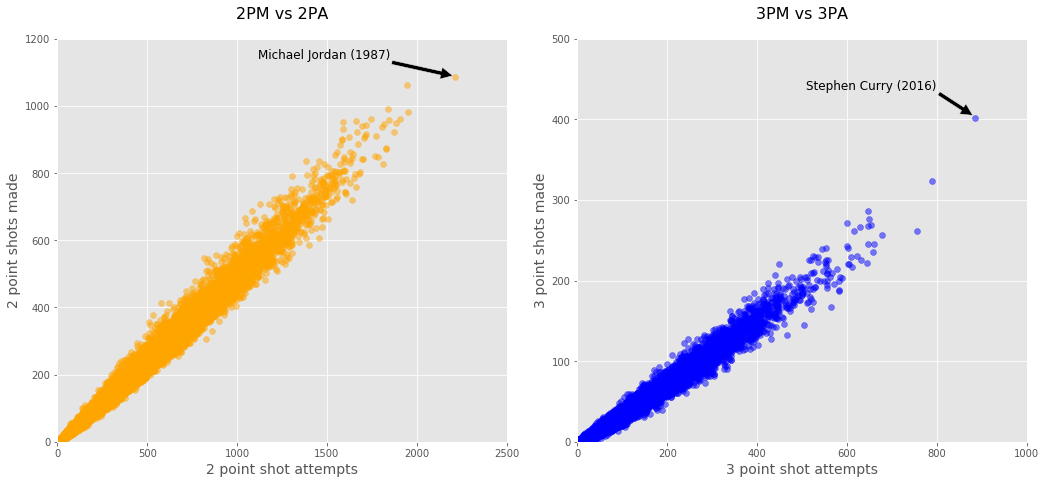

In [46]:
#set figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.tight_layout(pad=4)

# set plot 
ax[0].scatter(player_stats["2PA"], player_stats["2P"], color = 'orange', alpha = 0.5)
ax[0].set_xlim([0,2500])
ax[0].set_ylim([0,1200])

ax[1].scatter(player_stats["3PA"], player_stats["3P"], color = 'blue', alpha = 0.5)
ax[1].set_xlim([0,1000])
ax[1].set_ylim([0,500])


#set labels
ax[0].set_title('2PM vs 2PA', pad = 20, fontsize = 16)
ax[0].set_xlabel('2 point shot attempts', fontsize = 14)
ax[0].set_ylabel('2 point shots made', fontsize = 14)

ax[1].set_title('3PM vs 3PA', pad = 20, fontsize = 16)
ax[1].set_xlabel('3 point shot attempts', fontsize = 14)
ax[1].set_ylabel('3 point shots made', fontsize = 14)

# annotate text
ax[0].annotate('Michael Jordan (1987)', xy=(2200, 1090),xytext=(1850, 1170), 
               arrowprops=dict(facecolor='black'),horizontalalignment='right',verticalalignment='top', fontsize = 12)
ax[1].annotate('Stephen Curry (2016)', xy=(880, 405),xytext=(800, 450), 
               arrowprops=dict(facecolor='black'),horizontalalignment='right',verticalalignment='top', fontsize = 12);

### 4. Player background analysis

The NBA has made an effort to expand worldwide to generate more revenue and attract foreign talent, but where do players really come from? This section will explore player's backgrounds. 

Firstly, we want to determine a player's birth state (note our dataset includes the US state if they were born in the US and country if they were born outside of the US). To visualise this a new dataframe was created which included information on a state's latitude and longitude coordinates. 

In [140]:
# create list of unique states
states_lst = sorted(player_stats.Birth_State.unique())

# create df for states
df_coor = pd.DataFrame(states_lst, columns = ['Birth_State']) 

In [141]:
# use geopy library to add row to df with geolocation info on each state
nom = Nominatim(user_agent="my-application", timeout=None)
df_coor['coordinates'] = df_coor['Birth_State'].apply(nom.geocode) # adds rows with coordinate info on each state

In [144]:
# add longitude and latitude coordinates to new columns 
df_coor['lat'] = df_coor['coordinates'].apply(lambda x: x.latitude if x != None else None)
df_coor['lon'] = df_coor['coordinates'].apply(lambda x: x.longitude if x != None else None)

In [145]:
# create a new df of the count of unique players in each state
Birth_States = player_stats.groupby('Birth_State').Player.nunique()
Birth_States = Birth_States.to_frame().reset_index()
Birth_States.sort_values("Birth_State", inplace=True, ascending = True)

# merge both dfs
merged_df = df_coor.merge(Birth_States, on = 'Birth_State')

# convert 'Player' column to float
merged_df["Player"] = merged_df.Player.astype(float)

# drop rows with NaN
merged_df = merged_df.dropna()

In [146]:
merged_df.head()

,Birth_State,coordinates,lat,lon,Player
0,Alabama,"(Alabama, USA, (33.2588817, -86.8295337))",33.258882,-86.829534,57.0
1,Alaska,"(Alaska, USA, (64.4459613, -149.680909))",64.445961,-149.680909,1.0
2,Argentina,"(Argentina, (-34.9964963, -64.9672817))",-34.996496,-64.967282,10.0
3,Arizona,"(Arizona, USA, (34.395342, -111.7632755))",34.395342,-111.763276,8.0
4,Arkansas,"(Arkansas, USA, (35.2048883, -92.4479108))",35.204888,-92.447911,34.0


From the visualisation below we can see that the NBA truly has become global (please zoom in and out to see each state). Most international players come from Europe where basketball is also very popular. Africa and South America have produced some NBA talent,; however Asia appears to have produced the least NBA players. 

There are some interesting arguments as to why certain countries struggle to produce NBA calibre players. Without going into too much depth some explanations are provided below:

* the country may favour other sports and put their resources into those sports rather than develop basketball players.
* some players are NBA calibre but prefer the culture and style of basketball in their own country.
* some players are NBA calibre but not NBA stars so would not get much playing time/much more money in the NBA so prefer to stay at home.
* the NBA is a very physically demanding league e.g. you need to be a certain height, weight, build, have a certain level of athletism -- some would argue certain countries just do not produce many people physically capable of playing in the NBA.

The NBA is currently trying to popularise the sports worldwide by playing a small fraction of their games around the world throughout the season e.g. two teams will play in the London O2 arena in January.  

In [149]:
# create lists of latitude and longitude coordinates, state names and count of players in each state
lat = list(merged_df['lat'])
lon = list(merged_df['lon'])
states = list(merged_df['Birth_State'])
values = list(merged_df['Player'])

# make a dataframe with markers to show on the map
data = pd.DataFrame({
'lon':lon,
'lat':lat,
'name':states
})
data
 
# make an empty map
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 
# add marker one by one on the map
for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['lon']], popup=data.iloc[i]['name']).add_to(m)
    
m

#source: https://python-graph-gallery.com/312-add-markers-on-folium-map/ (ADD THIS TO SOURCE)

The NBA produces players from around the world, but what state produces the most NBA players? 

From the wordcloud below we can see that California, New York, Pennsylvania, Illinois and Michigan appear to be some of the top states producing NBA talent. 

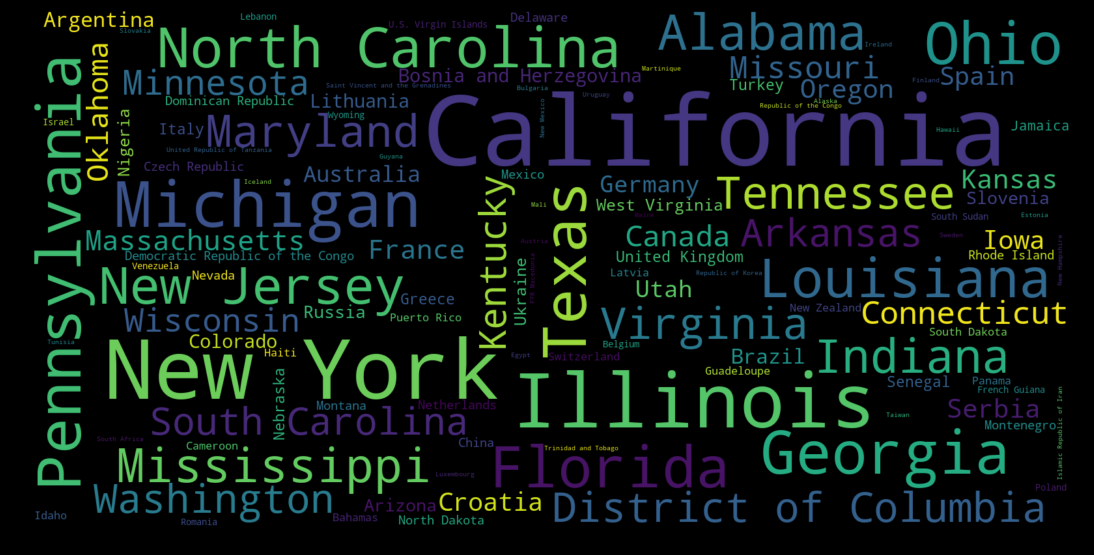

In [150]:
# create dictionary to store birth states and counts
d = {}
for a, x in Birth_States.values:
    d[a] = x


# Plot wordcloud of states vs frequency of players
wordcloud = WordCloud(width=1600, height=800, max_font_size=150)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Does this change by decade? 

Below are four donut charts looking at the percentage of talent produced by the top 5 NBA talent producing states out of the top 5 NBA talent producing states. 

From the donut charts, we can see that the top 3 birth states do not change in each decade since the 1980s. The top 3 are California, New York and Illinois. 

The top 5 states which have players in the NBA by decade:


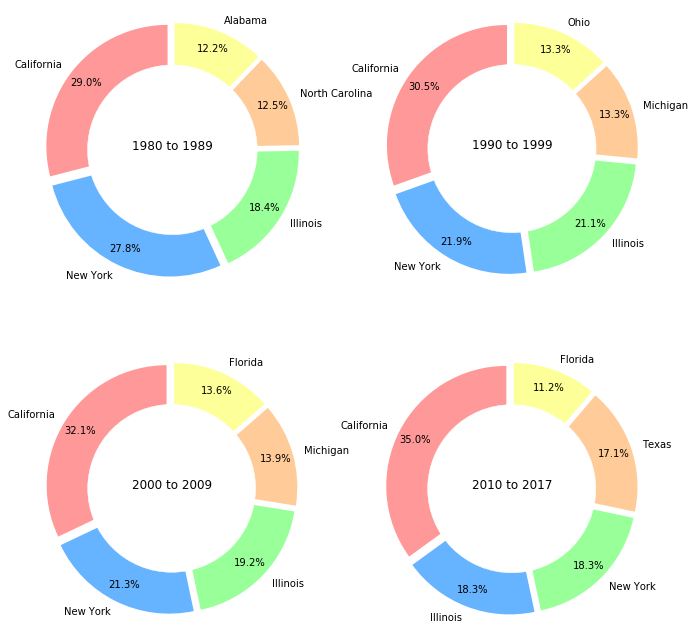

In [153]:
# create lists for top 5 birth states and corresponding player counts for each state
def birth_states(year1, year2, n):
    '''Creates dataframe for number of player from top player producing states in some time interval. 
    Returns the birth states and players from each birth in a list. n is the number of top states you wish to observe.'''
    Birth_States = (player_stats[(player_stats['Year']>= year1) & (player_stats['Year']<= year2)]
                    .groupby('Birth_State').Player.nunique())
    Birth_States = Birth_States.to_frame().reset_index()
    Birth_States.sort_values("Player", inplace=True, ascending = False)
    Birth_States = Birth_States.head(n)
    labels = Birth_States['Birth_State'].tolist()
    sizes = Birth_States['Player'].tolist()
    return labels, sizes

# use function to save birth states and player frequencies to lists for each decade
l1,s1 = birth_states(1980, 1989, 5) 
l2,s2 = birth_states(1990, 1999, 5)
l3,s3 = birth_states(2000, 2009, 5)
l4,s4 = birth_states(2010, 2017, 5)

# set plot
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
fig.tight_layout(pad=4)  

# set variables to use to create donut chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fdff99']
explode = [0.05]*5

# create function to create donut plot for the % of players in the top 5 birth states for each decade
def donut_chart(n, sizes, labels, year1, year2):
    '''creates a donut chart of players in the top 5 birth states for each decade'''
    ax[n].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
    ax[n].axis('equal')
    circle=matplotlib.patches.Circle( (0,0), 0.7, color='white')
    ax[n].add_artist(circle)
    ax[n].text(0, 0, str(year1) + ' to ' + str(year2), ha='center', fontsize = 12)

# show plots    
print('The top 5 states which have players in the NBA by decade:')        
donut_chart((0,0), s1, l1, 1980,1989) 
donut_chart((0,1), s2, l2, 1990,1999) 
donut_chart((1,0), s3, l3, 2000,2009) 
donut_chart((1,1), s4, l4, 2010,2017); 

Taking this a step further we look at the top cities producing NBA players within California, New York and Illinois. Our analysis shows that Los Angeles, New York City, Brooklyn and Chicago produce the most NBA talent in these states.

Interestingly, the Los Angeles Lakers, New York Knicks and Chicago Bulls are three of the NBA's most iconic and historic franchises. The Brooklyn Nets are also situated within New York and at one point in time were called the New York Nets. This could provide one explanation for why these cities have consistently produced NBA talent. 

There may be other reasons to explain these observation. This project will not explore these reasons in depth as the main aim is to explore a variety of visualisations. However, there will be a discussion in the conclusion on how this analysis could be taken forward in the future. 

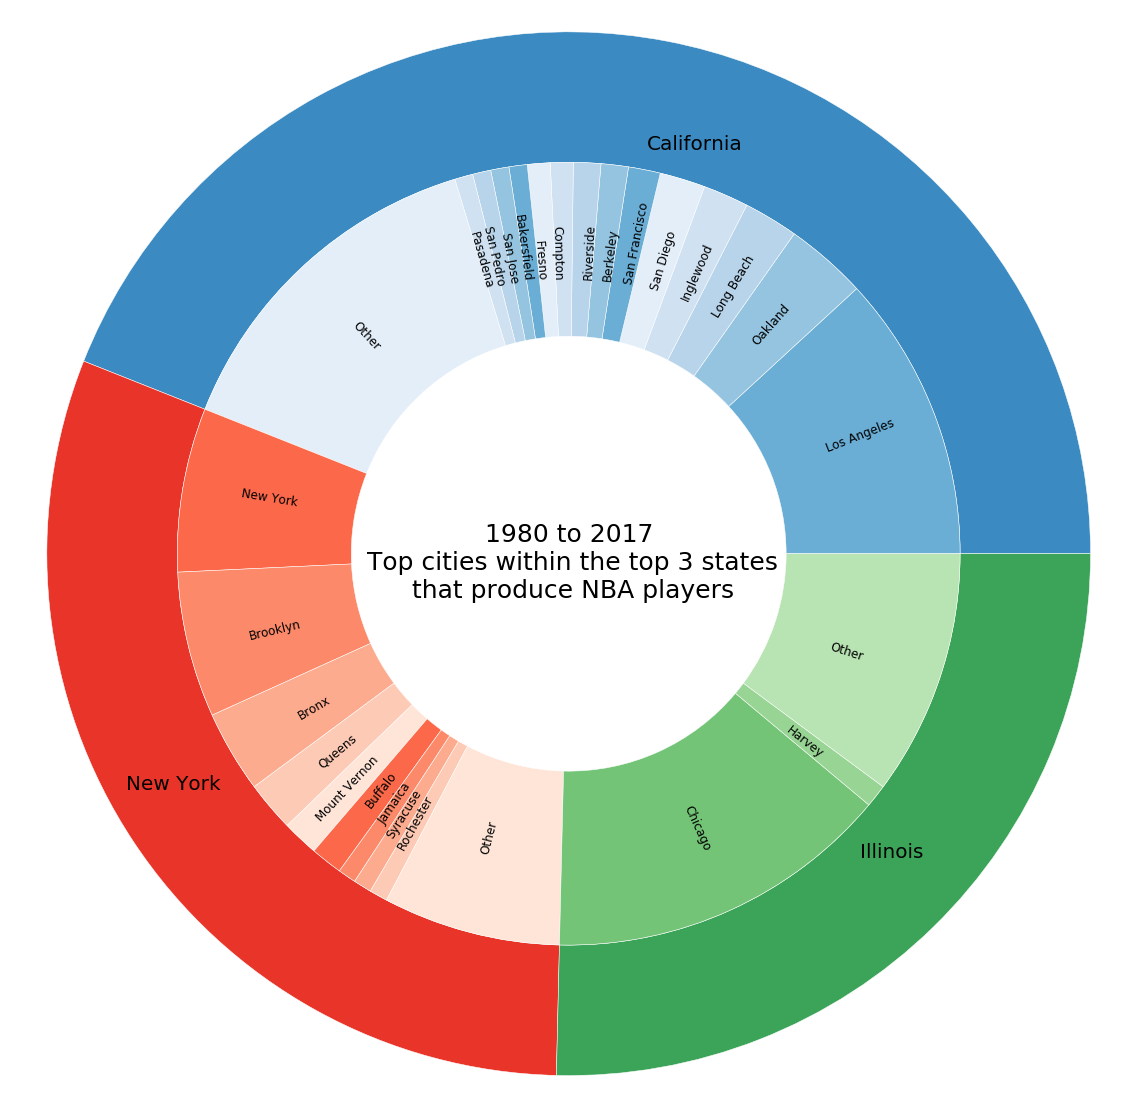

In [157]:
def BC_players_list(state):
    '''Assumes argument is a string. 
    For a given state this function creates a list of cities and a list of the frequency of players in those cities.
    Sums together cities with less than 3 players to create a new row called 'Other'. '''
    
    # create df of all in cites in a given state.
    df = player_stats[player_stats['Birth_State']== state]
    df = df.groupby('Birth_City').Player.nunique().nlargest(70)
    Birth_City = df.to_frame().reset_index()
    
    # sum total city's players for which the city contains 3 or less players. 
    #Counts the number of cities this entails.
    # Counts the total number of rows in df.
    sum = Birth_City.loc[Birth_City['Player'] <= 3, 'Player'].sum()
    removed = Birth_City.loc[Birth_City['Player'] <= 3, 'Player'].count()
    total = Birth_City['Player'].count()
    
    # removes unwanted cities and replaces them with 'Other' variable which 
    # is the sum of all players where they come from cities wih 3 or less players. 
    Birth_City = Birth_City.head(total-removed)
    df2 = pd.DataFrame([['Other', sum]], columns=['Birth_City','Player'])
    Birth_City = Birth_City.append(df2)
    
    # creates 2 lists, 1 for each column in the df. To be used for the donut chart below. 
    BC_list = list(Birth_City['Birth_City'])
    Players_list = list(Birth_City['Player'])
    return BC_list, Players_list


# lists of cities and frequencies of players for top 3 states
cali_bc, cali_players = BC_players_list('California')
ny_bc, ny_players = BC_players_list('New York')
ill_bc, ill_players = BC_players_list('Illinois')

# get labels and sizes 
group_names,group_size = birth_states(1980, 2017,3)
subgroup_names = cali_bc + ny_bc + ill_bc 
subgroup_size = cali_players + ny_players + ill_players 

 # create colors
a, b, c,=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
sub_colors = [a(0.5), a(0.4), a(0.3), a(0.2), a(0.1)]*3 + [b(0.5), b(0.4), b(0.3), b(0.2), b(0.1)]*2 + [c(0.5), c(0.4), c(0.3)]
 
# first Ring (outside)
fig, ax = plt.subplots(figsize = (20,20))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.2, labels=group_names, colors=[a(0.65), b(0.65), c(0.65)],labeldistance=0.8, 
                  textprops={'fontsize': 20})
ax.text(0, -0.1, '1980 to 2017\n Top cities within the top 3 states\n that produce NBA players'
        , ha='center', fontsize = 25)
plt.setp( mypie, width=0.3, edgecolor='white')
 
# second Ring (inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.2-0.3, labels=subgroup_names, labeldistance=0.7, 
                   colors=sub_colors, rotatelabels=True, textprops={'fontsize': 12})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0);

We have looked at where players are born, now we will look at where NBA talent is developed and prepared. For most this occurs whilst at college. Therefore, we will look at the colleges which produce the most NBA players. To visualise this a new dataframe was created which included information on a state's latitude and longitude coordinates.

Note, we can only observe US colleges as players that did not attend college or went to an international college are missing observations in the dataset. 210 players fall into this category. 

In [158]:
# create list of unique colleges
player_stats['College'] = player_stats['College'].astype(str)
college_lst = sorted(player_stats.College.unique())

# creates df for College
df_coor2 = pd.DataFrame(college_lst, columns = ['College']) 

In [159]:
# use geopy library to add row to df with geolocation info on each college
df_coor2['coordinates'] = df_coor2['College'].apply(nom.geocode) 

In [160]:
#add longitude and latitude coordinates to new columns 
df_coor2['lat'] = df_coor2['coordinates'].apply(lambda x: x.latitude if x != None else None)
df_coor2['lon'] = df_coor2['coordinates'].apply(lambda x: x.longitude if x != None else None)

In [166]:
# create a df of the count of unique players from each college
College = player_stats.groupby('College').Player.nunique()
College = College.to_frame().reset_index()
College.sort_values("College", inplace=True, ascending = True)

# merges the two dfs
merged_df2 = df_coor2.merge(College, on = 'College')
merged_df2 = merged_df2[:-1] # removes sum of values which are NaN at the bottom of the df
merged_df2["Player"] = merged_df2.Player.astype(float)

# drop NaN values
merged_df2 = merged_df2.dropna()

In [167]:
merged_df2.head()

,College,coordinates,lat,lon,Player
0,Alabama A&M University,"(J.F. Drake Learning Resources Center (LRC), P...",34.783622,-86.570198,1.0
1,Alabama State University,"(ASU, 915, South Jackson Street, Montgomery, M...",32.363891,-86.295668,1.0
2,Albany State University,"(Albany State University, 504, College Drive, ...",31.567880,-84.140579,3.0
3,Alcorn State University,"(Alcorn State University, Alcorn Avenue, Alcor...",31.877105,-91.141220,3.0
4,American International College,"(American International College, State Street,...",42.113395,-72.557286,1.0


A visual representation of the colleges attended can be seen on the map below. The location is where the college resides in the US and the size of the circle corresponds to the number of players to come from that college since 1980. 

Cities/states that most NBA players are born in (as previously discussed) are not where top basketball colleges are located (except for Syracuse in NY). The colleges producing the most NBA players are Duke, North Carolina, Kansas, Syracuse and Kentucky. This is not surprising as all of these are basketball recruiting colleges.   

From a first glance, the most shocking feature of the graph is that eastern colleges in America produce the majority of NBA players. One explanation could be that the best colleges in America have historically been on the east, so they tend to attract better players. Another reason could be that the best basketball players in high school choose to attend colleges on the east due to the similar time zone. This would be beneficial as eastern teams would be more likely to play against one other as they are closer and have a similar time zone -- hence there would be more competition at these colleges and greater chance for player development.  

In [164]:
# create lists of latitude and longitude coordinates, states names and count of players in each college
lat2 = list(merged_df2['lat'])
lon2 = list(merged_df2['lon'])
college2 = list(merged_df2['College'])
values2 = list(merged_df2['Player'])

# makes a df with dots to show on the map
data = pd.DataFrame({
   'lat':lat2,
   'lon':lon2,
   'name':college2,
   'value':values2
})
data
 
# makes an empty map
m = folium.Map(location=[40,-95], tiles="Mapbox Bright", zoom_start=4)
 
# adds dots one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*2500,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

#source: https://python-graph-gallery.com/313-bubble-map-with-folium/ (ADD THIS TO SOURCES)

# IV. Data Modelling 

To obtain further insights into our data we explore a number of data modelling techniques. 

This section starts by looking at correlations in the data, followed by dimesion reduction techniques and finally some network analysis. 

1. Ordinary Least Squares (OLS)
2. Correlation matrix
3. K means clustering
4. Principle Component Analysis (PCA)
5. Network Analysis

To understand some of the correlations in our data a simple OLS regression is run. We regress the variable win shares (WS) on age, minutes played (MP), player efficiency rating (PER), TRB, AST, STL, BLK, TOV, PF and PTS to understand how these variables influence the chances a player will win a game. 

From the regression output and graph below, we can see that all of the coefficients are significant. Most variables appear to have a positive effect on WS with PER having the greatest effect. PF and MP have barely any effect and as expected, TOV have a larger negative correlation with WS -- the more you turn the ball over the less opportunity you have to score a point. 

In [169]:
result = sm.ols(formula="WS ~ Age + MP + PER + TRB + AST + STL + BLK + TOV + PF + PTS", data=player_stats).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     WS   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     9963.
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:05:02   Log-Likelihood:                -22174.
No. Observations:               14719   AIC:                         4.437e+04
Df Residuals:                   14708   BIC:                         4.445e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7400      0.078    -35.333      0.0

In [14]:
def reg_plot(feature):
    fig, ax =plt.subplots(figsize = (15,10))
    sns.regplot(x=feature, y='WS', data=player_stats, color = 'red', ax = ax, 
                scatter_kws={"color": "red"}, line_kws={"color": "blue"})
    ax.set_xlabel(feature)
    ax.set_title(str(feature) + ' vs Win Shares', pad = 20)
 

features = ['Age', 'MP', 'PER', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
interact(reg_plot, feature = features)

interactive(children=(Dropdown(description='feature', options=('Age', 'MP', 'PER', 'TRB', 'AST', 'STL', 'BLK',…

<function __main__.reg_plot(feature)>

OLS works well for observing the correlation between one variable and others, however, to view the correlation among multiple variables a correlation matrix has been produced below. This is a good way to view lots of information at once. 

Some of the correlations below are:

- height and weight are positively correlated
- many of the key in-game statistics are correlated i.e. players who tend to score more also tend to get more rebounds and assists, this highlights the star player like nature of the NBA (you get star players who do nearly everything and role players who have much lesser roles) 
- height is negatively correlated with assists (we also saw this earlier with the boxplots)
- as the years increase 3PA increase whilst 2PA decrease (which we also saw earlier)

Clearly, there are lots of correlations and inferences which can be drawn from the visualisation below. 

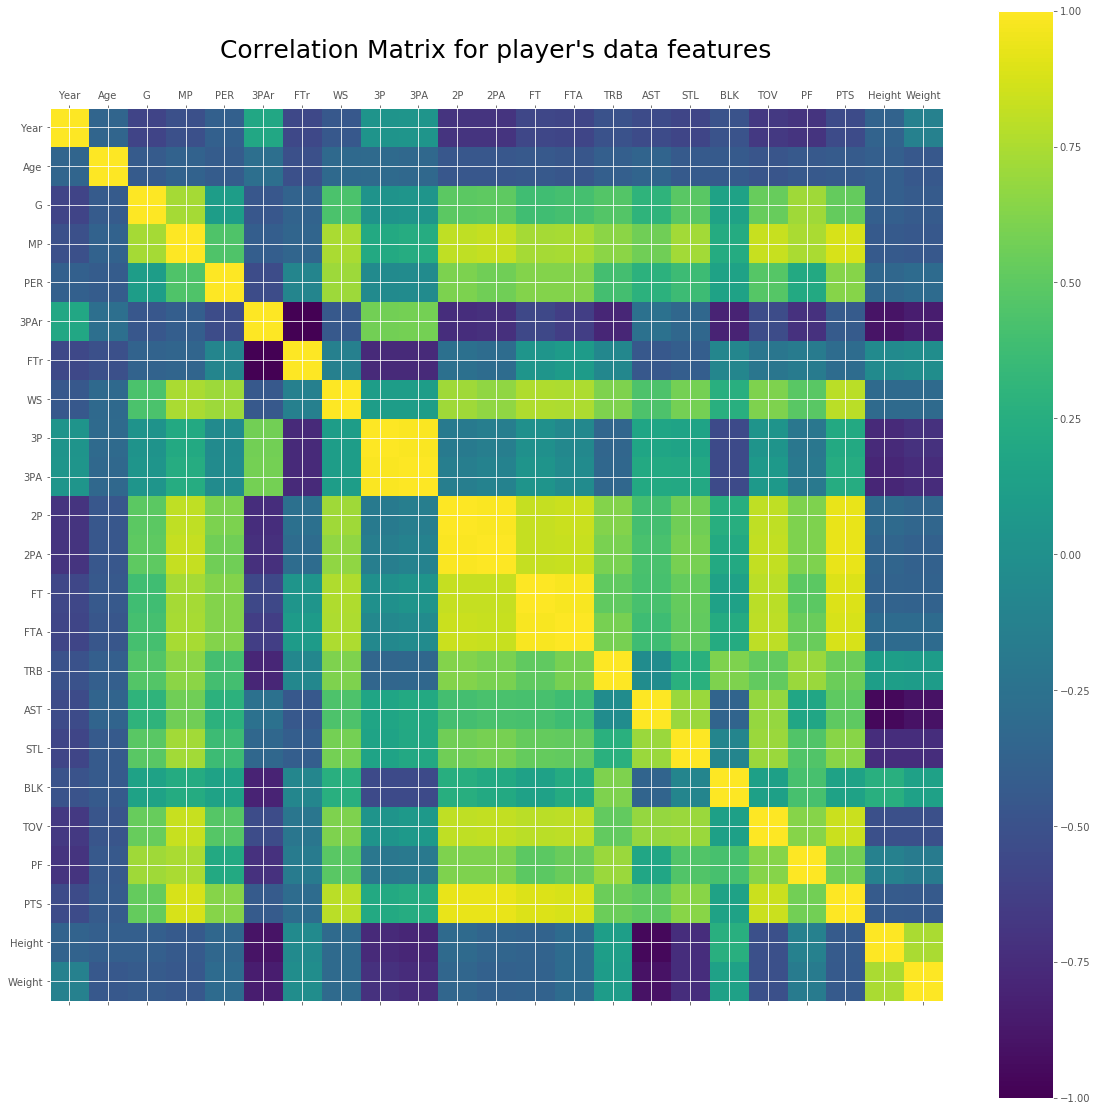

In [176]:
def plot_corr(df,size):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Takes dataframe and vertical/horizontal size of plot as inputs.
    Note the correlation matrix automatically removes categorical variables.'''

    # set figure
    fig, ax = plt.subplots(figsize=(size, size))
    
    # set plot
    corr = df.corr()
    
    # labels and colours
    cax = ax.matshow(corr, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    ax.set_title("Correlation Matrix for player's data features", fontsize = 25 )
    
    
plot_corr(player_stats, size = 20)

To condense the information in the correlation matrix, we implement the K means clustering algorithm to try and visualise the data in 5 clusters. The K means algorithm appears to converge at around 200 iterations and the number of players in each cluster can be seen below. Naturally, this occasionally varies very slightly between runs as the centroids are computed randomly, however the difference is negligible. 

In [177]:
# create df of only numeric variables
numeric_var = ['Year','Age','G', 'MP', 'PER','3PAr','FTr','WS','3P', '3PA', '2P', '2PA', 'FT', 'FTA',
                     'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Height', 'Weight']
data = player_stats[numeric_var]

In [ ]:
# impliment k means clustering algorithm and count points in each cluster
kmeans = KMeans(n_clusters = 5, init = 'random', max_iter = 200).fit(data)

for j in range(1,6):
    print('Cluster ' + str (j) + ': '+ str(len([i for i in kmeans.labels_ if i == j-1])))

For each variable we look at the percentage of each variable which is found in each cluster. The brighter the colour the higher the percentage of that variable in that cluster. 

Cluster 1 appears to cluster the physical attribute characteristics. Cluster 2 is more mixed and harder to tell what the key variable clusters are. Cluster 3 is clearly clustering many of the key in-game statistics. Cluster 4 appears to provide a similar cluster to cluster 3 (maybe one is showing players who accumulate a lot of in-game statistics whilst the other shows those who do not accumulate many). Cluster 5 is a mix. 

In [179]:
# create new column for clusters and order
data['cluster'] = kmeans.labels_
grouped = data.groupby(['cluster'], sort=True)

# find the percetage of each variable in a cluster
sums = grouped.sum()
perc = (100. * sums / sums.sum()).round(0)

# set plot
data2 = [go.Heatmap( z=perc.values.tolist(), 
                   y=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                   x=numeric_var,
                   colorscale='Viridis')]

layout=go.Layout(title="K means clustering visualisation for k = 5", xaxis={'title':'Numeric variables'}, yaxis={'title':'Clusters'})
figure=go.Figure(data=data2,layout=layout)

# show plot
py.iplot(figure, filename='pandas-heatmap')

C:\Paresh\Anaconda1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



To simplify data further we can use PCA. 

Firstly, we plot a scree plot to identify which principle components (PC) contain the most variance in our data. We identify 22 PCs, however after the 8th PC the variance in each component is negligible and we thus limit the x axis to only show 8 PCs. The majority of variance is accounted for in PC1 and PC2. 

In [32]:
# create numeric data from players_stats to use for PCA
player_stats.dtypes
player_stats_num = player_stats.select_dtypes(include='float64')
data = player_stats_num

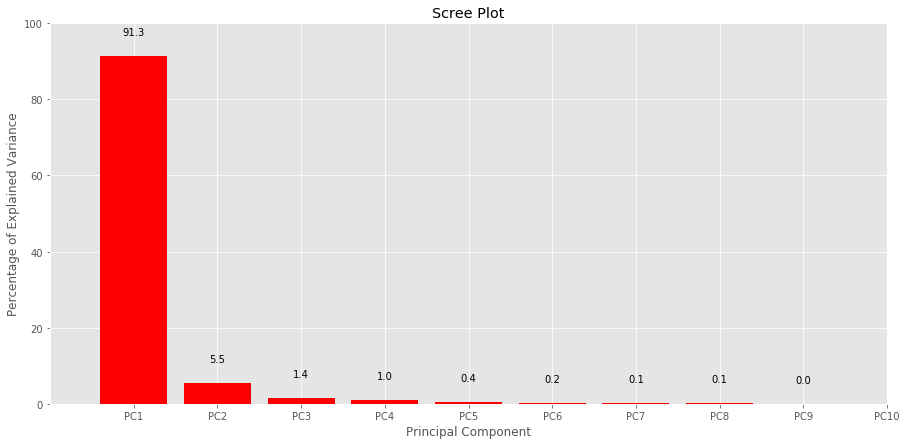

In [38]:
# perform PCA on the data
# first center and scale the data
scaled_data = preprocessing.scale(data.T)
 
# transform data
pca = PCA() # create a PCA object
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data) 

# obtain explained variance in each component 
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# draw a scree plot and a PCA plot
# set figure 
fig, ax = plt.subplots(figsize=(15,7))

# set plot
ax.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels, color = 'red')

# set labels
ax.set_ylabel('Percentage of Explained Variance')
ax.set_xlabel('Principal Component')
ax.set_ylim([0,100])
ax.set_xlim([0,10])
ax.set_title('Scree Plot')

# add percentages above bars 
rects = ax.patches

for rect, label in zip(rects, per_var[0:9]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
# source: https://statquest.org/2018/01/08/statquest-pca-in-python/

We create a loadings plot to plot PC1 vs PC2. Each variable is labelled on the graph to show how much of the component can be explained by PC1 or PC2. 

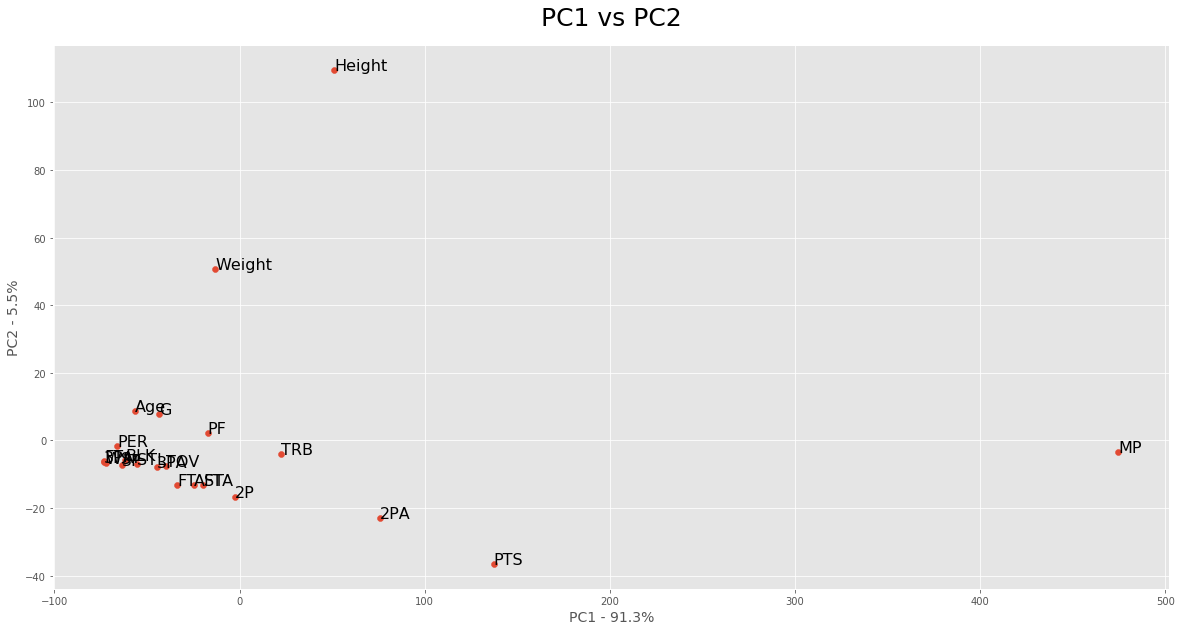

In [39]:
# create df for PCs
var = ['Age', 'G','MP', 'PER', '3PAr', 'FTr','WS', '3P', '3PA', '2P', '2PA','FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Height', 'Weight']
pca_df = pd.DataFrame(pca_data, index = var, columns=labels)

# set figure
fig, ax = plt.subplots(figsize=(20,10))

# set plot
plt.scatter(pca_df.PC1, pca_df.PC2)

# set labels
plt.title('PC1 vs PC2', fontsize = 25, pad = 20)
plt.xlabel('PC1 - {0}%'.format(per_var[0]), fontsize = 14)
plt.ylabel('PC2 - {0}%'.format(per_var[1]), fontsize = 14)

# annotate points
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]), fontsize = 16)

Furthermore, we can view a 3D projection of first 3 PCs. 

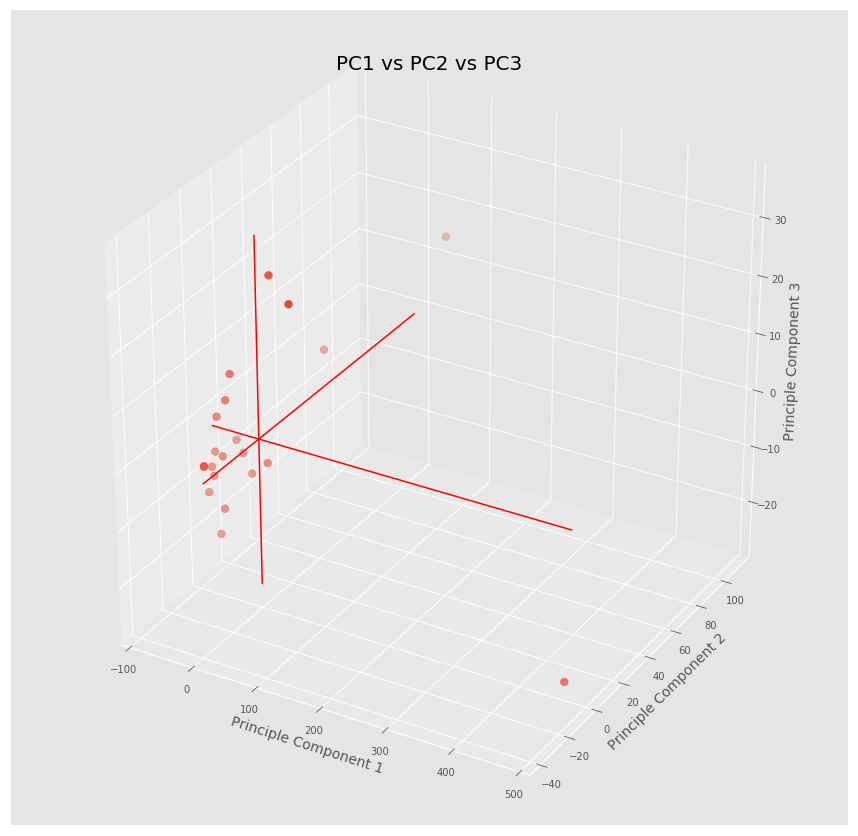

In [40]:
# set figure and plot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], cmap="Set2_r", s=60)

# set labels
ax.set_xlabel("Principle Component 1", fontsize = 14)
ax.set_ylabel("Principle Component 2", fontsize = 14)
ax.set_zlabel("Principle Component 3", fontsize = 14)
ax.set_title("PC1 vs PC2 vs PC3", fontsize = 20)
 
# make simple, bare axis lines through space
xAxisLine = ((min(pca_df['PC1']), max(pca_df['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pca_df['PC2']), max(pca_df['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pca_df['PC3']), max(pca_df['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r');

Finally, this project undertakes some network analysis to observe the volume of trades between teams. To achieve this a new dataframe was created from our original dataframe to capture the volume of trades between teams. 

In [13]:
# create df of players and teams they've played for
X = player_stats[['Player', 'Tm']]

In [14]:
teams = []
def trades(player):
    '''For a given player in the player_stats df, this function creates a list of tuples 
    of the player's first team and the team they get traded to.'''
    df = X.loc[X['Player'] == player].reset_index(drop=True)
    df['Match'] = df.Tm == df.Tm.shift()
    indices = df.index[df['Match'] == False].tolist()
    indices.remove(0) 
    for index in indices:
        teams.append((df.iloc[index-1]['Tm'],df.iloc[index]['Tm']))
        
# creates list of unique players
players = list(pd.unique(X[['Player']].values.ravel('K')))
#print((players[0:5]))

# runs player in players list through trade function to identfy when they were traded and to who
for i in players:
    trades(i)

In [18]:
# create df for team 1 team 2 (the team the player was traded to) and the count of trades between these teams
columns = ['T1', 'T2']
df = pd.DataFrame([x for x in teams], columns=columns)

trades = df.groupby(['T1','T2'])['T2'].count()
trades = trades.to_frame()
trades.columns = ['Count']
trades = trades.reset_index()

trades.head()

,T1,T2,Count
0,ATL,BOS,2
1,ATL,BRK,2
2,ATL,CHA,1
3,ATL,CHH,2
4,ATL,CHI,4


Now we can use this dataframe to produce a graph using NetworkX and Graphviz.

In [21]:
# create the graph by adding edges one by one
G = nx.Graph()

for index, row in trades.iterrows():
    G.add_edge(row['T1'], row['T2'], weight=row['Count'])
    
# print(G.degree())

# remove isolated vertices (if any)    
remove = [node for node,degree in G.degree() if degree ==0]
G.remove_nodes_from(remove)


In [22]:
# graph size
print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")

# connected components
gsizes = [nx.number_of_nodes(glen) for glen in nx.connected_component_subgraphs(G)]
print("G connected component sizes:", sorted(gsizes, reverse=True))

graph has 41 nodes with 662 edges
1 connected components
G connected component sizes: [41]


Graphviz network graphs for Twopi, Circo, Dot, Neato and Spring layout were tested. After running each the Spring layout produced the most appropriate visualisation to analysis the trades between teams.

One of the variables near to the centre is called TOT. This is not a team, but in fact when a player switches between multiple teams in a given season. Thus, it makes sense for this variable to be very near to the centre. Also, close to the centre are teams which tend to not do too well and thus trade lots of players to try and improve. Just outside of those teams are the historic NBA franchises which have a history of winning. These teams do not struggle to retain talent, thus keeping players for longer resulting in them having to trade less frequently. Around the edges of the network are NBA teams which have changed names over time (maybe to rebrand themselves or because the team moved to a new city). As a result, they have had a shorter history than other teams resulting in trades with only a select few teams. 

Despite this clearly the NBA is very interconnected. 

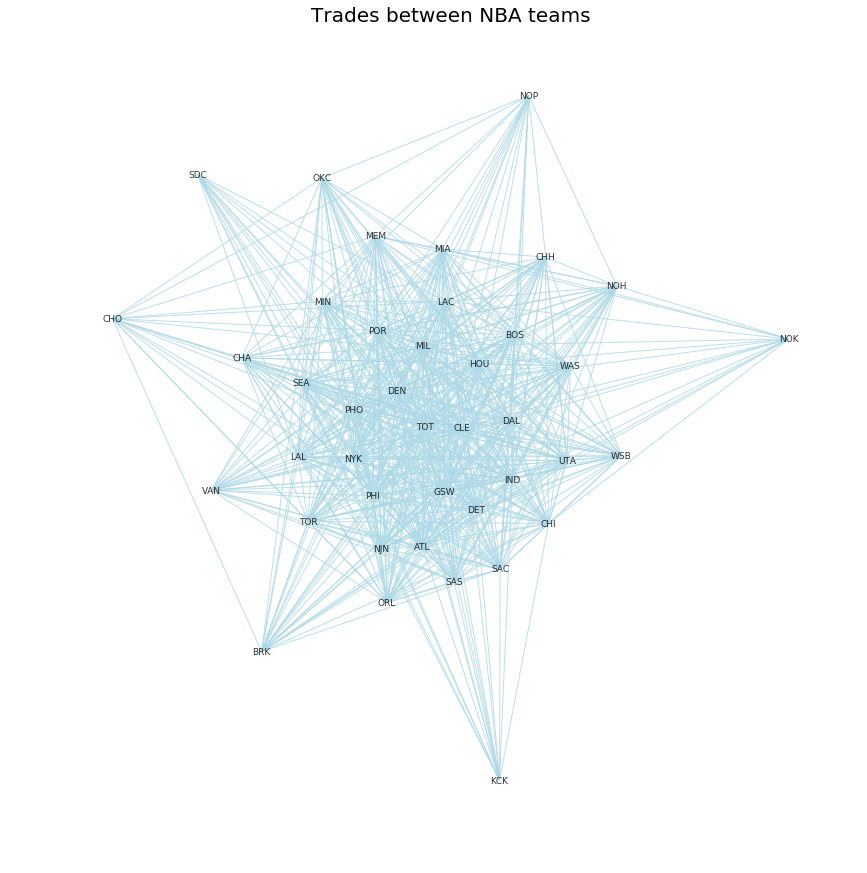

In [26]:
options = {
...     'node_color': 'lightblue',
...     'edge_color': 'lightblue',
...     'node_size': 1,
...     'width': 1,
...     'alpha': .8,
... }

plt.subplots(figsize=(12,12))

pos=nx.spring_layout(G)

labels=nx.draw_networkx_labels(G,pos=pos,font_size=9,**options)
nx.draw_networkx_edges(G,pos=pos,**options)

plt.tight_layout()
plt.margins(x=0.1, y=0.1)
plt.axis('off');
plt.title('Trades between NBA teams', fontsize = 20);
#source: class week 11 notes

# V. Conclusion

Several conclusions can be drawn from this project regarding the state of the NBA. 

Firstly, the NBA embraces a wide variety of players with different physical attributes, despite the consensus that only tall athletic players play basketball. Although the majority do still tend to be the tall athletic type, there is some variation as different players require different physical attributes and skillsets. 

Secondly, the 3-point shot has become an integral aspect of today's game with teams shooting more 3-pointers than ever. This uptick in 3-pointers has increased over time, with a sharp increase recently due to the success of Stephen Curry and the Golden State Warriors. Consequently, this has resulted in a general decrease in the number of 2-pointers taken. 

Thirdly, most of the NBA talent is developed in America. However, some players are born outside of the US and attend foreign colleges before entering the NBA -- with the most international players coming from Europe. The league is currently trying to expand its popularity internationally by playing a select few games from the regular season in foreign countries such as India, Brazil and China. 

Finally, this project finds that better teams find it easier to retain players and subsequently trade less with other teams. 

There are a few areas where research from this project could be taken forward in future works. Examples include:

- looking at the salaries offered to different player positions to determine if teams value certain players  more than others and if this has changed over time. 
- identifying if it is easier to cluster players by position in previous decades, as it has been argued by critics that the NBA has become more position-less over time. 
- observing how players have adapted to the new 3-point craze throughout their careers and seeing which players have been the most successful in adapting.
- why certain states/cities consistently produce NBA talent. Are these cities/states populated with more of the NBA 'type'? Do poverty/education levels play a role in determining one's likelihood of entering the NBA? Does population size play a role?
- a look into why certain teams have thrived historically, where as others have struggled.  
- creating a machine learning model to predict if a player was short or tall.

## VI. References

1. Wharton, University of Pennsylvannia. (2017). The NBA’s Adam Silver: How Analytics Is Transforming Basketball. [online]. Available at:http://knowledge.wharton.upenn.edu/article/nbas-adam-silver-analytics-transforming-basketball/ [Accessed 15 Dec 2018].
2. Kaggle. (2018). NBA Players stats since 1950. [online]. Available at: https://www.kaggle.com/drgilermo/nba-players-stats#Seasons_Stats.csv [Accessed 9 Nov 2018]
3. Youtube, (2018). Shaquille O'Neal Breaks the backboard!. [online]. Available at: https://www.youtube.com/watch?v=HK1Ltjl_7xk&feature=youtu.be&t=18 [Accessed 16 Dec 2018]
4. Reddit. (2014). Manute Bol and Muggsy Bogues of the '87 Washington Bullets. [online]. Available at: https://www.reddit.com/r/sports/comments/25h2q9/manute_bol_and_muggsy_bogues_of_the_87_washington/ [Accessed 16 Dec 2018]. 
5. Youtube. (2017). Basketball Positions and Roles | Basketball. [online]. Available at: https://www.youtube.com/watch?v=4_4CymXARWQ [Accessed 17 Dec 2018].
6. Basketball for Coaches. (2018). Basketball Positions: Key Roles and Responsibilities. [online]. Available at: https://www.basketballforcoaches.com/basketball-positions/ [Accessed 18 Dec 2018].
7. Youtube. (2018). How data transformed the NBA | The Economist. [online]. Available at: https://www.youtube.com/watch?v=oUvvfHkXyOA [Accessed 18 Dec 2018].
8. Youtube. (2017). Stephen Curry - Deepest Career Threes. [online]. Available at: https://www.youtube.com/watch?v=5_Of0iDAE3g [Accessed 19 Dec 2018]
 